## Create the figures used in Stochastic Variance Reduced Gradient Plug-and-Play Methods for Solving Image Reconnstruction Problems (ICIP 2021)

In [1]:
%matplotlib inline 

# from imports import *
import torch
import matplotlib.pyplot as plt
import numpy as np
from algorithms import *
from Utilities import display_results
import sys
sys.path.append('problems/')
sys.path.append('denoisers/')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

from problems.PR import PhaseRetrieval

cuda


In [2]:
from denoisers.MMODenoise import MMODenoiser
architecture='DnCNN_nobn' 
n_ch=1
noise_level_den=0.009

cuda = True if torch.cuda.is_available() else False
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor
torch.backends.cudnn.benchmark = True

mmo_denoiser = MMODenoiser(channels=n_ch, cuda=cuda, sigma=noise_level_den, root_path='./denoisers/')


cuda driver found - moving to GPU.

Loading ./denoisers/checkpoints/pretrained/DnCNN_nobn_nch_1_nlev_0.009.pth...



In [25]:
from denoisers.BM3D import BM3DDenoiser
bm3d_denoiser = BM3DDenoiser(sigma_modifier=1.0, decay=0.995)

In [4]:
from denoisers.NLM import NLMDenoiser
nlm_denoiser = NLMDenoiser(sigma_modifier=0.9)

In [5]:
from denoisers.TV import TVDenoiser
tv_denoiser = TVDenoiser(sigma_modifier=0.9)

# Compare Image Fidelity for Different Algorithms with BM3D Denoiser

In [6]:
height = 128
width = 128
alpha = .5       # ratio measurements / dimensions
snr = 20.

main_problem = PhaseRetrieval(img_path='./data/Set12/04.png', H=height, W=width, num_meas=int(alpha*height*width), snr=snr)

0.06032872800131944 8192


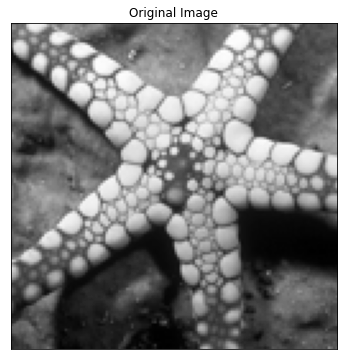

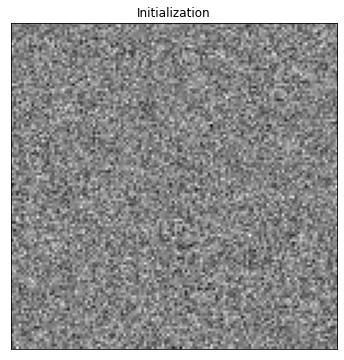

In [7]:
main_problem.display(show_measurements=False, save_results=True)
print(main_problem.sigma, main_problem.M)

In [53]:
results_svrg_bm3d = pnp_svrg(main_problem, denoiser=bm3d_denoiser, eta=.2, tt=30, T2=8, mini_batch_size=800, lr_decay=0.99, verbose=True, converge_check=False, diverge_check=True)

0 0 Before denoising:  11.873032170576721
After denoising update: 0 0 12.162459195569081
0 1 Before denoising:  10.830038922114078
After denoising update: 0 1 12.851532114126691
0 2 Before denoising:  11.32126185228037
After denoising update: 0 2 13.6429423514764
0 3 Before denoising:  11.372884102636924
After denoising update: 0 3 14.302542690370611
0 4 Before denoising:  11.512669696218506
After denoising update: 0 4 14.913270880823116
0 5 Before denoising:  11.642649271611996
After denoising update: 0 5 15.60855428559927
0 6 Before denoising:  11.992385096446318
After denoising update: 0 6 16.210700491914974
0 7 Before denoising:  12.068372303369738
After denoising update: 0 7 16.487831175131944
1 0 Before denoising:  17.49950917098615
After denoising update: 1 0 17.48201133631037
1 1 Before denoising:  18.043701538678132
After denoising update: 1 1 18.251319033509006
1 2 Before denoising:  18.219168078530902
After denoising update: 1 2 18.831548337127295
1 3 Before denoising:  18.5

Output PSNR: 26.8	Change in PSNR: 7.25	Gradient Time: 20.29	Denoising Time: 20.29


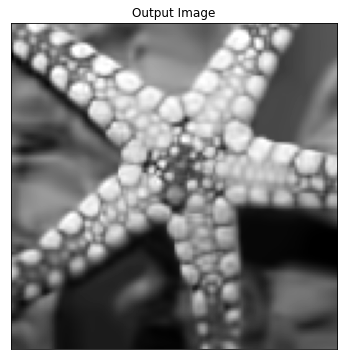

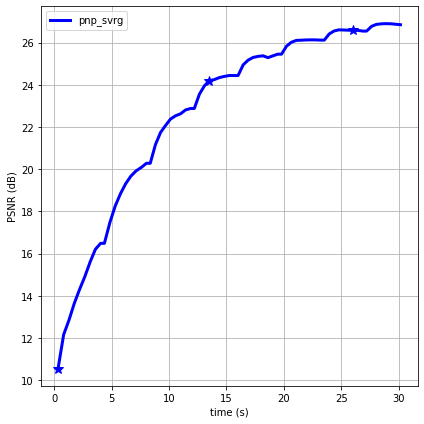

In [54]:
master_psnr_fig = display_results(main_problem, results_svrg_bm3d, save_results=True)

In [95]:
results_sgd_bm3d = pnp_sgd(main_problem, denoiser=bm3d_denoiser, eta=.3, tt=30, mini_batch_size=1000, lr_decay=0.99, verbose=True, converge_check=False)

0 Before denoising:  7.959608043322971
0 After denoising:  12.410636136993773
1 Before denoising:  10.270325621062417
1 After denoising:  13.491891869555268
2 Before denoising:  11.272221183855498
2 After denoising:  14.434218180891618
3 Before denoising:  12.13225919173694
3 After denoising:  15.386367172262617
4 Before denoising:  13.10439850700843
4 After denoising:  16.228600443272878
5 Before denoising:  14.151918179862246
5 After denoising:  16.91562334385686
6 Before denoising:  14.849502588677122
6 After denoising:  17.487936382458106
7 Before denoising:  15.344435472746996
7 After denoising:  18.146748374409235
8 Before denoising:  16.030568443310063
8 After denoising:  18.612530079284557
9 Before denoising:  16.605507826714568
9 After denoising:  19.02305656620211
10 Before denoising:  17.139849318367723
10 After denoising:  19.4812216450964
11 Before denoising:  17.58325757983072
11 After denoising:  19.811537658874762
12 Before denoising:  17.866382152602913
12 After denois

Output PSNR: 25.1	Change in PSNR: 5.32	Gradient Time: 24.79	Denoising Time: 24.79


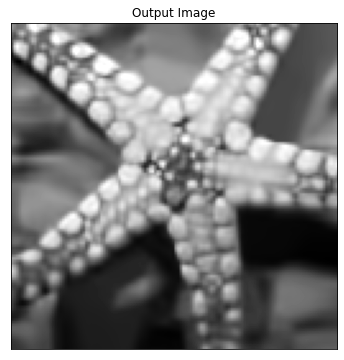

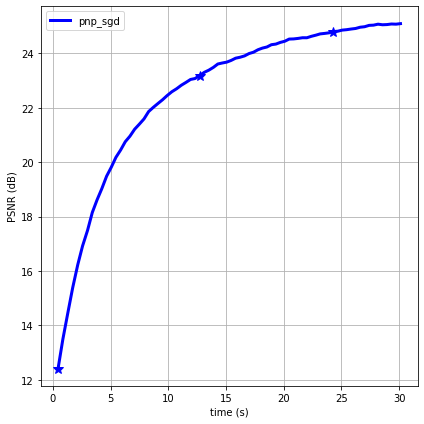

In [97]:
master_psnr_fig = display_results(main_problem, results_sgd_bm3d, save_results=True)

In [36]:
results_gd_bm3d = pnp_gd(main_problem, denoiser=bm3d_denoiser, eta=.5, tt=30, verbose=True, converge_check=False)

0 Before denoising:  11.399992270906745
0 After denoising:  13.50980481984698
1 Before denoising:  14.309620566914319
1 After denoising:  15.983822571065591
2 Before denoising:  16.78255762957293
2 After denoising:  18.178506433479058
3 Before denoising:  18.92998021822583
3 After denoising:  20.043741440921465
4 Before denoising:  20.76602294558855
4 After denoising:  21.556969989306083
5 Before denoising:  22.10243062434642
5 After denoising:  22.64772924476429
6 Before denoising:  23.02967220876182
6 After denoising:  23.42397873189541
7 Before denoising:  23.674761801949348
7 After denoising:  23.97934334456094
8 Before denoising:  24.12796066734527
8 After denoising:  24.391649843164906
9 Before denoising:  24.464327770785005
9 After denoising:  24.70355537273218
10 Before denoising:  24.716921129515043
10 After denoising:  24.942453059906427
11 Before denoising:  24.914222768180142
11 After denoising:  25.12722495517631
12 Before denoising:  25.06356057397082
12 After denoising: 

Output PSNR: 25.9	Change in PSNR: 15.51	Gradient Time: 15.11	Denoising Time: 15.11


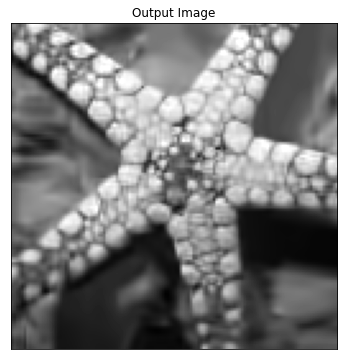

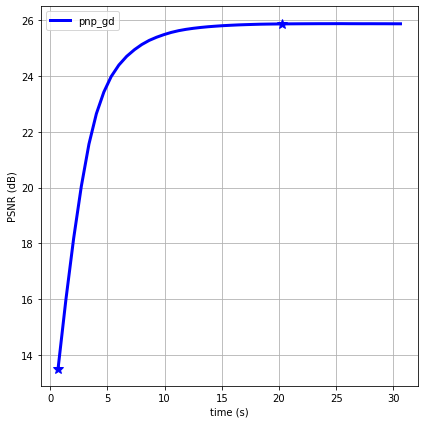

In [37]:
master_psnr_fig = display_results(main_problem, results_gd_bm3d, save_results=True)

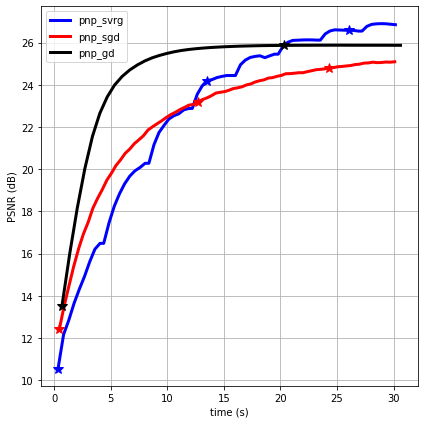

In [98]:
psnr_fig = plt.figure(figsize=(6,6))
psnr_ax = psnr_fig.add_subplot(1,1,1)
    
tArray1 = results_svrg_bm3d['time_per_iter']
psnrArray1 = results_svrg_bm3d['psnr_per_iter']
tArray2 = results_sgd_bm3d['time_per_iter']
psnrArray2 = results_sgd_bm3d['psnr_per_iter']
tArray3 = results_gd_bm3d['time_per_iter']
psnrArray3 = results_gd_bm3d['psnr_per_iter']
psnr_ax.plot(np.cumsum(tArray1), psnrArray1, "b", linewidth=3, label=str(results_svrg_bm3d['algo_name']))
psnr_ax.plot(np.cumsum(tArray1)[::30], psnrArray1[::30], "b*", markersize=10)
psnr_ax.plot(np.cumsum(tArray2), psnrArray2, "r", linewidth=3, label=str(results_sgd_bm3d['algo_name']))
psnr_ax.plot(np.cumsum(tArray2)[::30], psnrArray2[::30], "r*", markersize=10)
psnr_ax.plot(np.cumsum(tArray3), psnrArray3, "k", linewidth=3, label=str(results_gd_bm3d['algo_name']))
psnr_ax.plot(np.cumsum(tArray3)[::30], psnrArray3[::30], "k*", markersize=10)
psnr_ax.set(xlabel='time (s)', ylabel='PSNR (dB)')
psnr_ax.legend()
psnr_ax.grid()
psnr_fig.tight_layout()

# Compare Image Fidelity for Different Algorithms with BM3D Denoiser

In [110]:
results_svrg_mmo = pnp_svrg(main_problem, denoiser=mmo_denoiser, eta=.01, tt=60, T2=5, mini_batch_size=100, lr_decay=0.99, verbose=True, converge_check=False, diverge_check=True)

0 0 Before denoising:  10.639414708459473
After denoising update: 0 0 10.677222219774507
0 1 Before denoising:  10.752805270658598
After denoising update: 0 1 10.7891400582276
0 2 Before denoising:  10.863729867180398
After denoising update: 0 2 10.898654633473512
0 3 Before denoising:  10.965381312923414
After denoising update: 0 3 10.999009474256296
0 4 Before denoising:  11.066921188110364


c:\Users\14807\Documents\GitHub\pnp-svrg\problems\problem.py:35: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  return peak_signal_noise_ratio(self.Xrec, w.reshape(self.H, self.W))


After denoising update: 0 4 11.09936959639219
1 0 Before denoising:  11.159279329593064
After denoising update: 1 0 11.190513849144638
1 1 Before denoising:  11.245276763509796
After denoising update: 1 1 11.275464862613207
1 2 Before denoising:  11.32939896967342
After denoising update: 1 2 11.358366682058792
1 3 Before denoising:  11.41038705272565
After denoising update: 1 3 11.43813637603442
1 4 Before denoising:  11.487242624781324
After denoising update: 1 4 11.513710734011763
2 0 Before denoising:  11.557760031465964
After denoising update: 2 0 11.582933139841373
2 1 Before denoising:  11.623211712938415
After denoising update: 2 1 11.647255088366768
2 2 Before denoising:  11.687369356724922
After denoising update: 2 2 11.71008399220971
2 3 Before denoising:  11.748729910419618
After denoising update: 2 3 11.77006443768397
2 4 Before denoising:  11.806513570304666
After denoising update: 2 4 11.826433632336188
3 0 Before denoising:  11.863171810022875
After denoising update: 3 0

Output PSNR: 19.0	Change in PSNR: 7.94	Gradient Time: 13.03	Denoising Time: 13.03


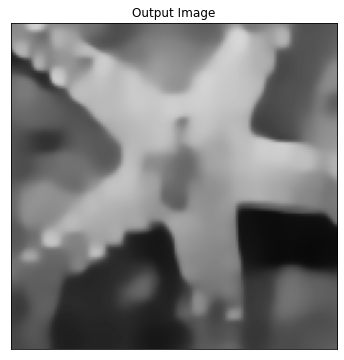

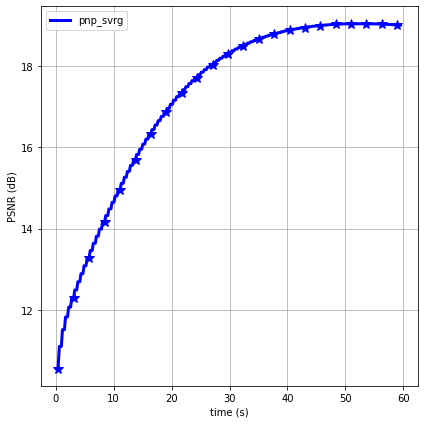

In [111]:
master_psnr_fig = display_results(main_problem, results_svrg_mmo, save_results=True)

In [16]:
results_sgd_mmo = pnp_sgd(main_problem, denoiser=mmo_denoiser, eta=.2, tt=60, mini_batch_size=1000, verbose=True, converge_check=False)

0 Before denoising:  10.608502993629145
0 After denoising:  10.646670382892363
1 Before denoising:  10.698194670886421
1 After denoising:  10.735311364490038
2 Before denoising:  10.785895301442967
2 After denoising:  10.821992004621443

c:\Users\14807\Documents\GitHub\pnp-svrg\problems\problem.py:35: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  return peak_signal_noise_ratio(self.Xrec, w.reshape(self.H, self.W))



3 Before denoising:  10.864381314621925
3 After denoising:  10.899680947169434
4 Before denoising:  11.110042859125564
4 After denoising:  11.142308092775526
5 Before denoising:  11.17944199064526
5 After denoising:  11.210681228098252
6 Before denoising:  11.251036914924462
6 After denoising:  11.281221237956501
7 Before denoising:  11.321044923584848
7 After denoising:  11.350344428638554
8 Before denoising:  11.38454498075842
8 After denoising:  11.41298719806161
9 Before denoising:  11.447387840128027
9 After denoising:  11.474969059229405
10 Before denoising:  11.510573059127596
10 After denoising:  11.53739813342741
11 Before denoising:  11.640135927105975
11 After denoising:  11.664321878686625
12 Before denoising:  11.697795263523133
12 After denoising:  11.721076859384073
13 Before denoising:  11.750383141348014
13 After denoising:  11.772627723571192
14 Before denoising:  11.80310548906139
14 After denoising:  11.824434798804793
15 Before denoising:  11.859077409106495
15 Af

Output PSNR: 20.5	Change in PSNR: 21.80	Gradient Time: 7.76	Denoising Time: 7.76


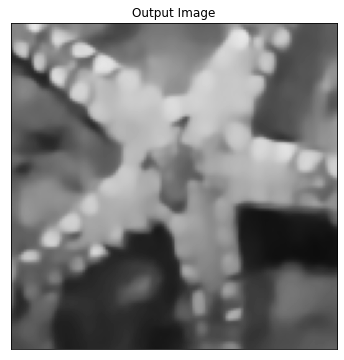

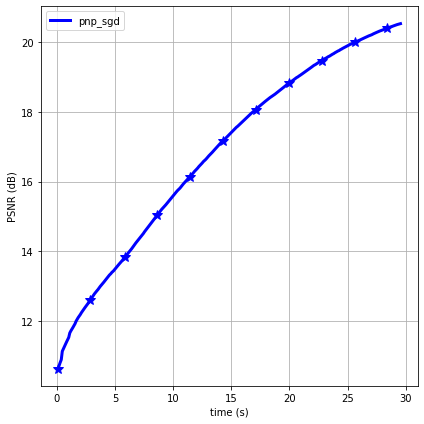

In [17]:
master_psnr_fig = display_results(main_problem, results_sgd_mmo, save_results=True)

In [18]:
results_gd_mmo = pnp_gd(main_problem, denoiser=mmo_denoiser, eta=.1, tt=60, verbose=True, converge_check=False)

0 Before denoising:  11.326543890974587
0 After denoising:  11.362778831577431


c:\Users\14807\Documents\GitHub\pnp-svrg\problems\problem.py:35: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  return peak_signal_noise_ratio(self.Xrec, w.reshape(self.H, self.W))


1 Before denoising:  11.768251348970399
1 After denoising:  11.803489946852398
2 Before denoising:  12.020587221000913
2 After denoising:  12.056643238522856
3 Before denoising:  12.175072573865606
3 After denoising:  12.212761343032515
4 Before denoising:  12.275758605779865
4 After denoising:  12.315071508826247
5 Before denoising:  12.34475858038133
5 After denoising:  12.385429185376779
6 Before denoising:  12.393936892577152
6 After denoising:  12.435734104956829
7 Before denoising:  12.43010120715975
7 After denoising:  12.472818147122009
8 Before denoising:  12.457403309667136
8 After denoising:  12.500868187664445
9 Before denoising:  12.478462693058086
9 After denoising:  12.522535250946929
10 Before denoising:  12.495128601426394
10 After denoising:  12.539704004249334
11 Before denoising:  12.508611270962165
11 After denoising:  12.5536099830014
12 Before denoising:  12.519750915846782
12 After denoising:  12.565088141193954
13 Before denoising:  12.529136727310547
13 After 

Output PSNR: 12.8	Change in PSNR: 27.24	Gradient Time: 2.81	Denoising Time: 2.81


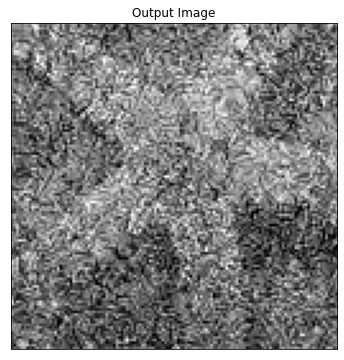

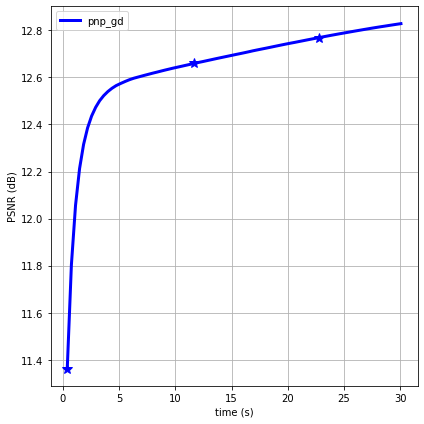

In [19]:
master_psnr_fig = display_results(main_problem, results_gd_mmo, save_results=True)